# Create PhaseDiagram object from total energies calculations

In [20]:
from pynter.data.datasets import Dataset
from pymatgen.analysis.phase_diagram import PhaseDiagram
from pynter.phase_diagram.analysis import PDHandler
from pynter.phase_diagram.plotter import PDPlotterAdder
from pymatgen.core.composition import Composition

### Import Dataset

In [2]:
ds = Dataset.from_json('../data/phase-diagram-PBE.json')

In [3]:
ds.jobs_table(properties_to_display=['final_energy'])

,formula,group,nodes,is_converged,final_energy
job_name,,,,,
Na,Na20,Na,,True,-25.905673
Na2Nb3O6,Na8 Nb12 O24,Na2Nb3O6,,True,-351.629081
Na2O,Na2 O1,Na2O,,True,-11.341335
Na2O2,Na6 O6,Na2O2,,True,-50.978526
Na3NbO4,Na12 Nb4 O16,Na3NbO4,,True,-205.932322
Na5NbO5,Na10 Nb2 O10,Na5NbO5,,True,-126.051115
NaNb10O18,Na2 Nb20 O36,NaNb10O18,,True,-519.361599
NaNbO2,Na2 Nb2 O4,NaNbO2,,True,-60.354693
NaNbO3,Na2 Nb2 O6,NaNbO3,,True,-77.023950


### Create list of ComputedStructureEntry objects

The input for the `PhaseDiagram` is a list of entries. The basis is a `PDEntry` object which is a tuple with (`Composition`,energy value). The most efficient way is to use the `ComputedStructureEntry` objects read from the `vasprun.xml` file, which is already stored by default as an attribute in `VaspJob` objects. 

In [9]:
entries = []
for j in ds:
    entries.append(j.computed_entry)

### Create PhaseDiagram from entries

In [12]:
pd = PhaseDiagram(entries)

In [15]:
pd

Na-Nb-O phase diagram
15 stable phases: 
NaNbO3, Na3NbO4, Na2O2, NbO, Na2Nb3O6, Na5NbO5, O2, NaNb10O18, Na2O, NaO2, Nb2O5, Na, Nb, NbO2, NaNbO2

## Plot PhaseDiagram with pymatgen and pynter

The `PDHandler` class (`pynter`) offers useful shortcuts to plot the phase diagram with `pymatgen`. Additionally, the `PDPlotterAdder` class in `pynter` can be used to add features to the plot (e.g. reservoir points, constant chemical potential lines and heatmap). 

/nfshome/villa/pynter/pynter/phase_diagram/plotter.py:131: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z,vmax=0,**kwargs)


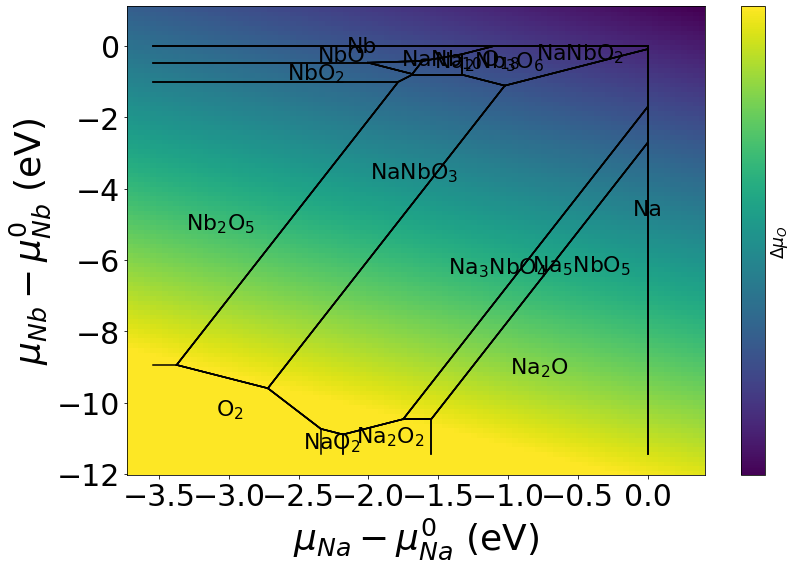

In [23]:
comp = Composition('NaNbO3')
PDHandler(pd).get_stability_diagram(elements=['Na','Nb'])
PDPlotterAdder(pd).add_heatmap(comp,['Na','Nb']);